<a href="https://colab.research.google.com/github/twiesenb/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Wiesenberg_DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
#load data, validating shape, adding informative names
import pandas as pd
df= pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', header=None, names=['age', 'op_year', 'nodes_pos', 'survival'])
print(df.shape)
df.head()

(306, 4)


,age,op_year,nodes_pos,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [0]:
#missing values check
df.isna().sum()
#no missing values

age          0
op_year      0
nodes_pos    0
survival     0
dtype: int64

In [0]:
#value count pre-edit
print(df['survival'].value_counts())
#survival feature engineering
df['survival'] = [0 if d==2 else 1 for d in df['survival']]
#evaluating success
df['survival'].value_counts()
#success

1    225
2     81
Name: survival, dtype: int64


1    225
0     81
Name: survival, dtype: int64

In [0]:
#making operation year into datetime
df['op_year'] = [(d-70)*365 for d in df['op_year']]
df['op_year'] = pd.to_datetime(df['op_year'], unit='D')
df['op_year'] = df['op_year'].dt.year

## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [0]:
#table 1: basic stats
df.describe()

,age,op_year,nodes_pos,survival
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,1962.852941,4.026144,0.735294
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,1958.000000,0.000000,0.000000
25%,44.000000,1960.000000,0.000000,0.000000
50%,52.000000,1963.000000,1.000000,1.000000
75%,60.750000,1965.750000,4.000000,1.000000
max,83.000000,1969.000000,52.000000,1.000000


In [0]:
#table 2: operation year, survival crosstab
pd.crosstab(df['survival'],df['op_year'], normalize='columns')

op_year,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969
survival,,,,,,,,,,,,
0,0.333333,0.333333,0.142857,0.115385,0.304348,0.266667,0.258065,0.464286,0.214286,0.16,0.230769,0.363636
1,0.666667,0.666667,0.857143,0.884615,0.695652,0.733333,0.741935,0.535714,0.785714,0.84,0.769231,0.636364


In [0]:
#table 3: age, survival crosstab
age_bins = pd.cut(df['age'], 5)
pd.crosstab(age_bins, df['survival'], normalize='index')

survival,0,1
age,,
"(29.947, 40.6]",0.093023,0.906977
"(40.6, 51.2]",0.313131,0.686869
"(51.2, 61.8]",0.281250,0.718750
"(61.8, 72.4]",0.271186,0.728814
"(72.4, 83.0]",0.333333,0.666667


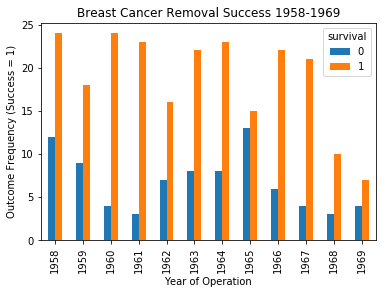

In [0]:
#plot 1: survival vs op year
import matplotlib.pyplot as plt
df.groupby('survival')['op_year'].value_counts().unstack(0).plot.bar()
plt.xlabel('Year of Operation')
plt.ylabel('Outcome Frequency (Success = 1)')
plt.title('Breast Cancer Removal Success 1958-1969');

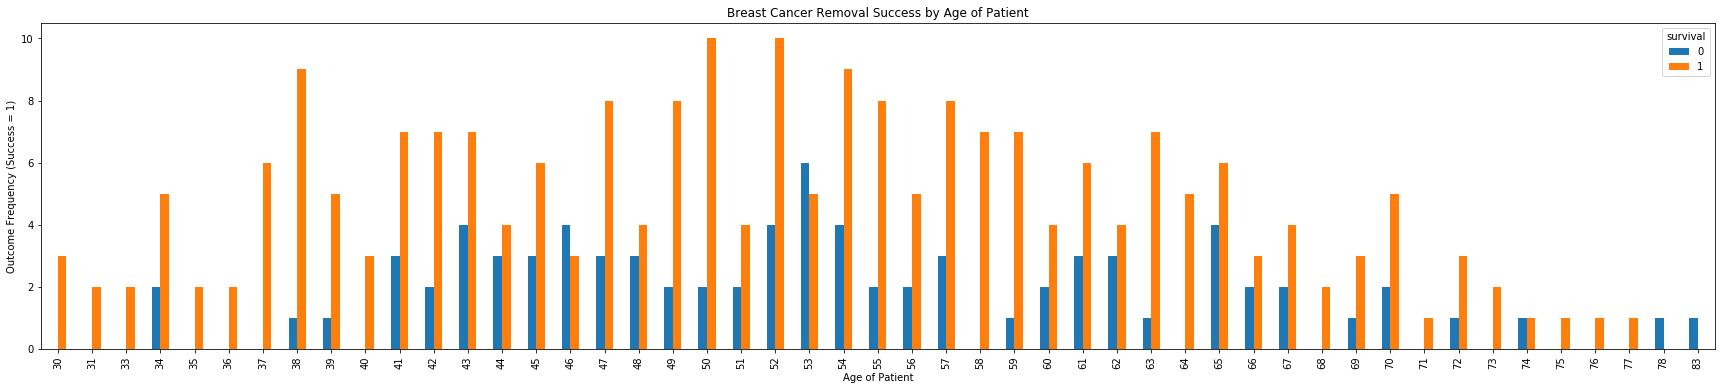

In [0]:
#plot 2: survival vs age
df.groupby('survival')['age'].value_counts().unstack(0).plot.bar(figsize=(30,6))
plt.xlabel('Age of Patient')
plt.ylabel('Outcome Frequency (Success = 1)')
plt.title('Breast Cancer Removal Success by Age of Patient');

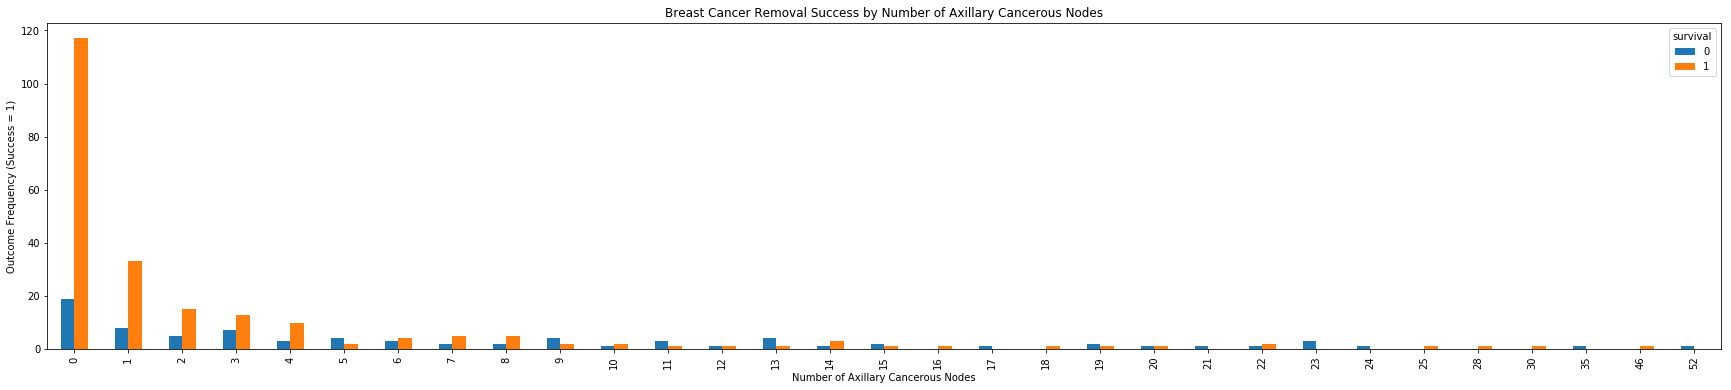

In [0]:
#plot 3: nodes vs age
df.groupby('survival')['nodes_pos'].value_counts().unstack(0).plot.bar(figsize=(30,6))
plt.xlabel('Number of Axillary Cancerous Nodes')
plt.ylabel('Outcome Frequency (Success = 1)')
plt.title('Breast Cancer Removal Success by Number of Axillary Cancerous Nodes');

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.



*   Having no or few axillary (additional) cancerous nodes makes survival much more likely, regradless of age or year of operation.
*   Being very young or very old will decrease the chance of survival.
*   Unfortunately, cancer can grow much quicker than people age, so regardless of age, it is more important to get screened for Breast Cancer frequently to minimize the chance of cancer growth and maximize prompt treatment if necessary.


